In [ ]:
# Import Libraries and Files
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('SalaryData.csv')

In [ ]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [ ]:
df.shape

(40, 3)

In [ ]:
df.size

120

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


**1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually**

A null hypothesis is a hypothesis that says there is no statistical significance between the two variables in the hypothesis. It is the hypothesis  that the researcher is trying to disprove.

An alternative hypothesis simply is the inverse, or opposite, of the null hypothesis.

at 95% confidence.

**𝐻0:** 𝜇 (Salary of Education type **Doctorate** ) = 𝜇 (Salary of Education type **bachelors Education** ) =  𝜇 (Salary of Education type **HS-grad** )

**𝐻𝐴:** 𝜇 (Salary of Education type **Doctorate** ) ≠ 𝜇 (Salary of Education type **bachelors Education** ) ≠ 𝜇 (Salary of Education type **HS-grad** )

**1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

In [ ]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
anov_table = anova_lm(model)
print(anov_table)


                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [ ]:
print(' At the level of 5% significance, p-value < 0.05, that means we will have to reject the null hypothesis since p value > Level of significance')

 At the level of 5% significance, p-value < 0.05, that means we will have to reject the null hypothesis since p value > Level of significance


**1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

In [ ]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
anov_table = anova_lm(model)
print(anov_table)


                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [ ]:
 print('At the level of 5% significance, p-value > 0.05, that means we will have to accept the null hypothesis since p value > Level of significance')

At the level of 5% significance, p-value > 0.05, that means we will have to accept the null hypothesis since p value > Level of significance


**1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.**



## Problem 1B:
### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.


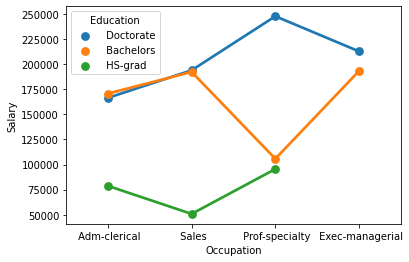

In [ ]:
sns.pointplot(x='Occupation', y= 'Salary', data =df, hue = 'Education', ci=None);

### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [ ]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education) :C(Occupation)'
model = ols(formula, df).fit()
anov_table = anova_lm(model)
print(anov_table)


                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


### 1.7 Explain the business implications of performing ANOVA for this particular case study.

From the above analysis, it is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

# Problem 2:

 The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.



In [ ]:
Ed= pd.read_csv('Education Post 12th Standard.csv')

In [ ]:
Ed.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
Ed.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [ ]:
Ed.shape


(777, 18)

In [ ]:
Ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
Ed.isnull().sum()


Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [ ]:
dups = Ed.duplicated()
dups.sum()

0

In [ ]:
Ed.describe().T


,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

Text(0.5, 1.0, 'Top10perc Distribution')

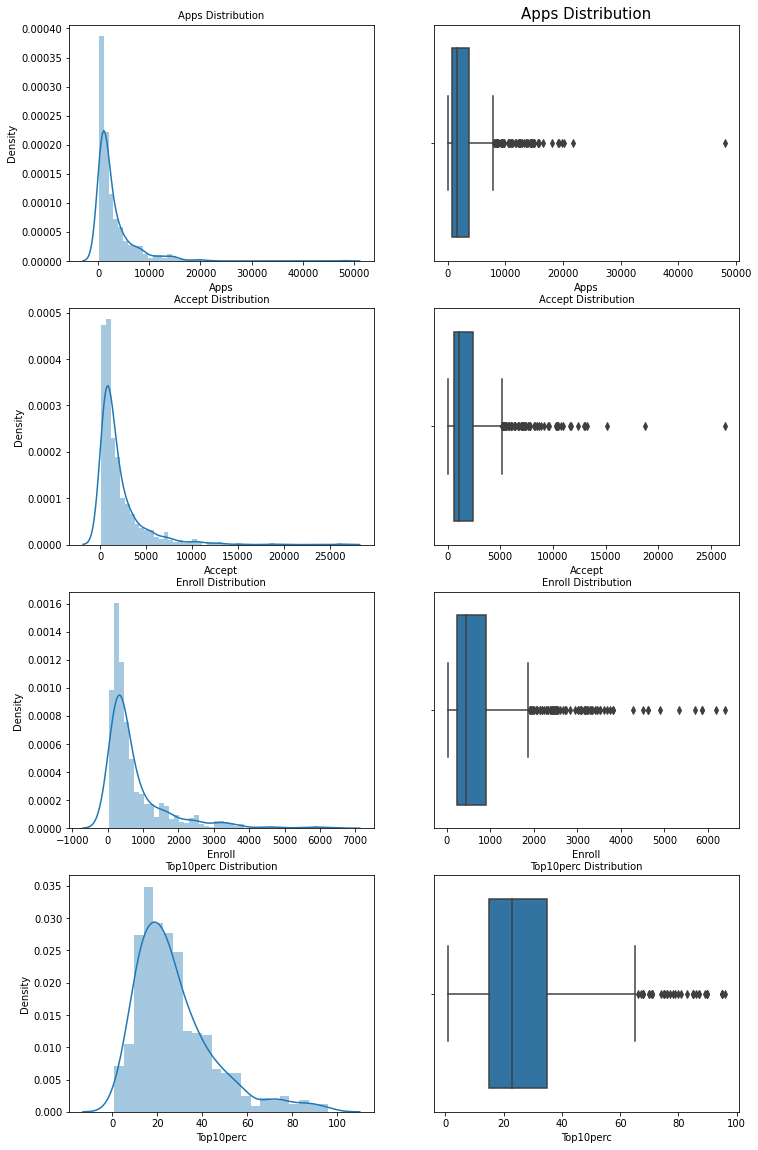

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(Ed['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(Ed['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(Ed['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)

a = sns.boxplot(Ed['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(Ed['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(Ed['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.distplot(Ed['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(Ed['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)

Text(0.5, 1.0, 'Outstate Distribution')

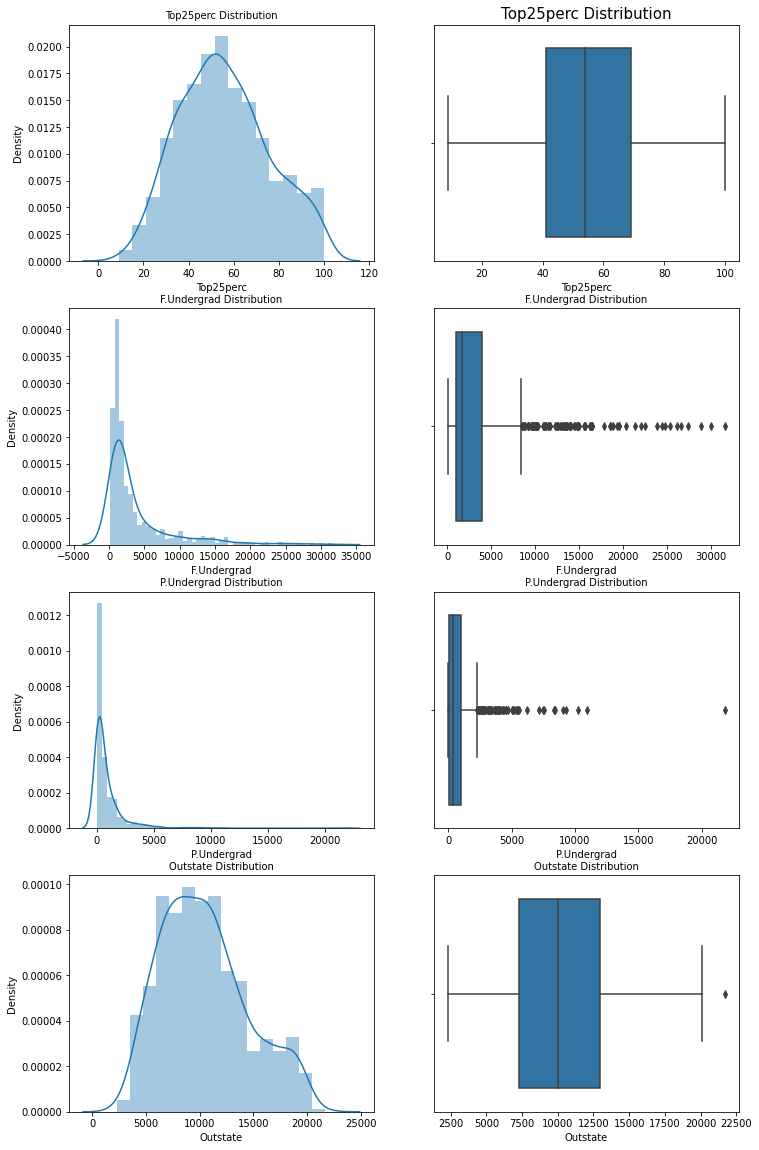

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(Ed['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.boxplot(Ed['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(Ed['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(Ed['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(Ed['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(Ed['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.distplot(Ed['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(Ed['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)


Text(0.5, 1.0, 'PhD Distribution')

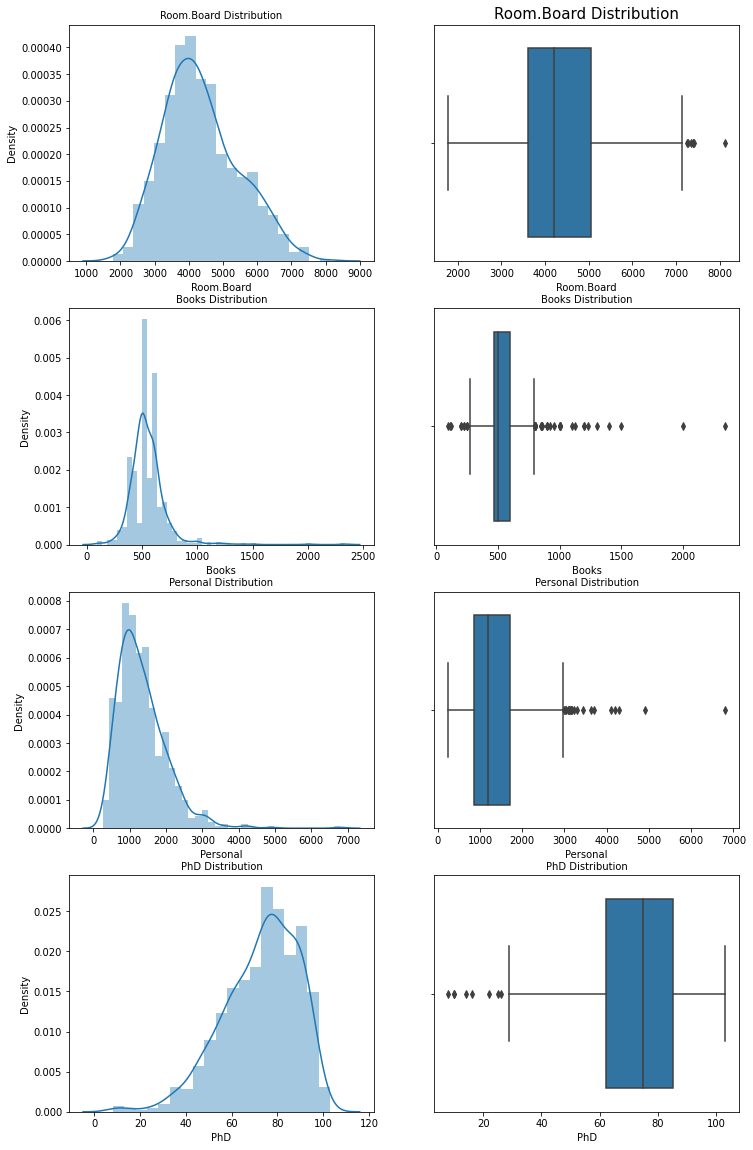

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(Ed['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.boxplot(Ed['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(Ed['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(Ed['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(Ed['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(Ed['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)

a = sns.distplot(Ed['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(Ed['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)


Text(0.5, 1.0, 'Grad.Rate Distribution')

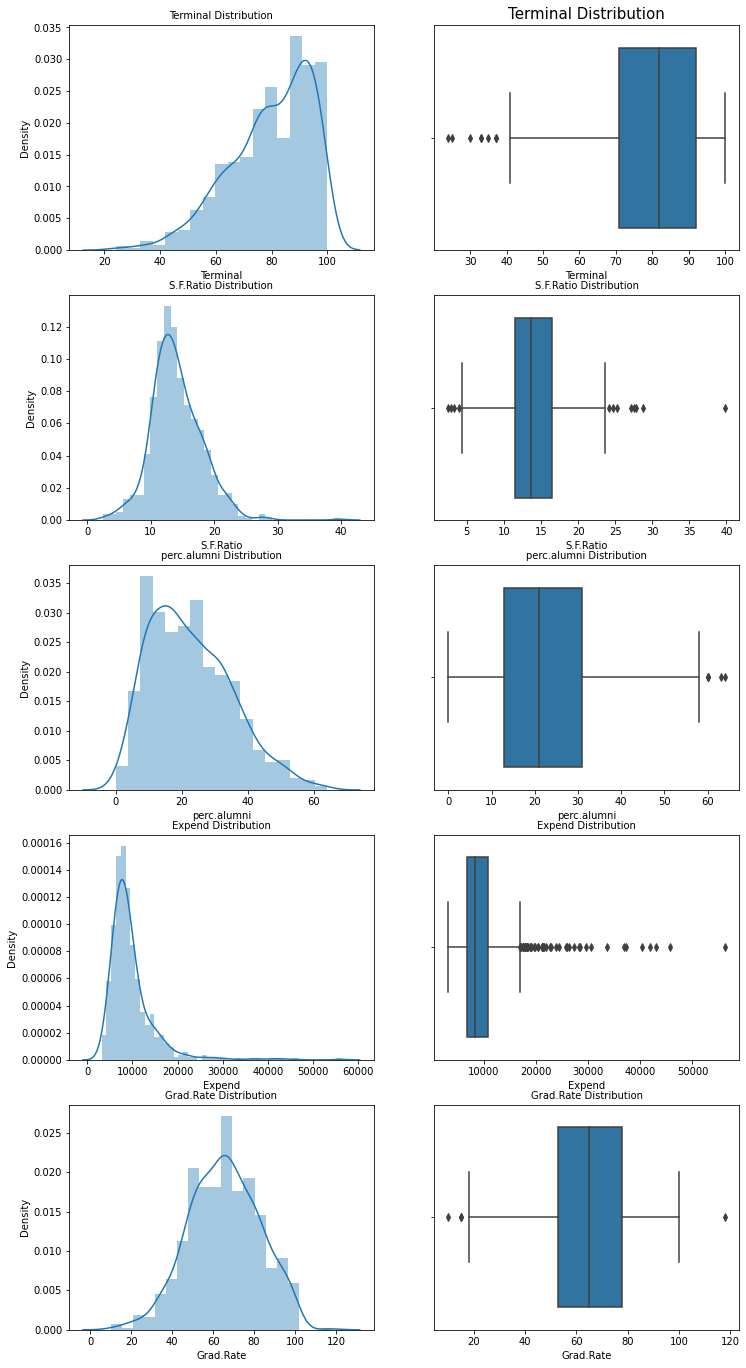

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 24)
a = sns.distplot(Ed['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.boxplot(Ed['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(Ed['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(Ed['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(Ed['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(Ed['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.distplot(Ed['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(Ed['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(Ed['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(Ed['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)

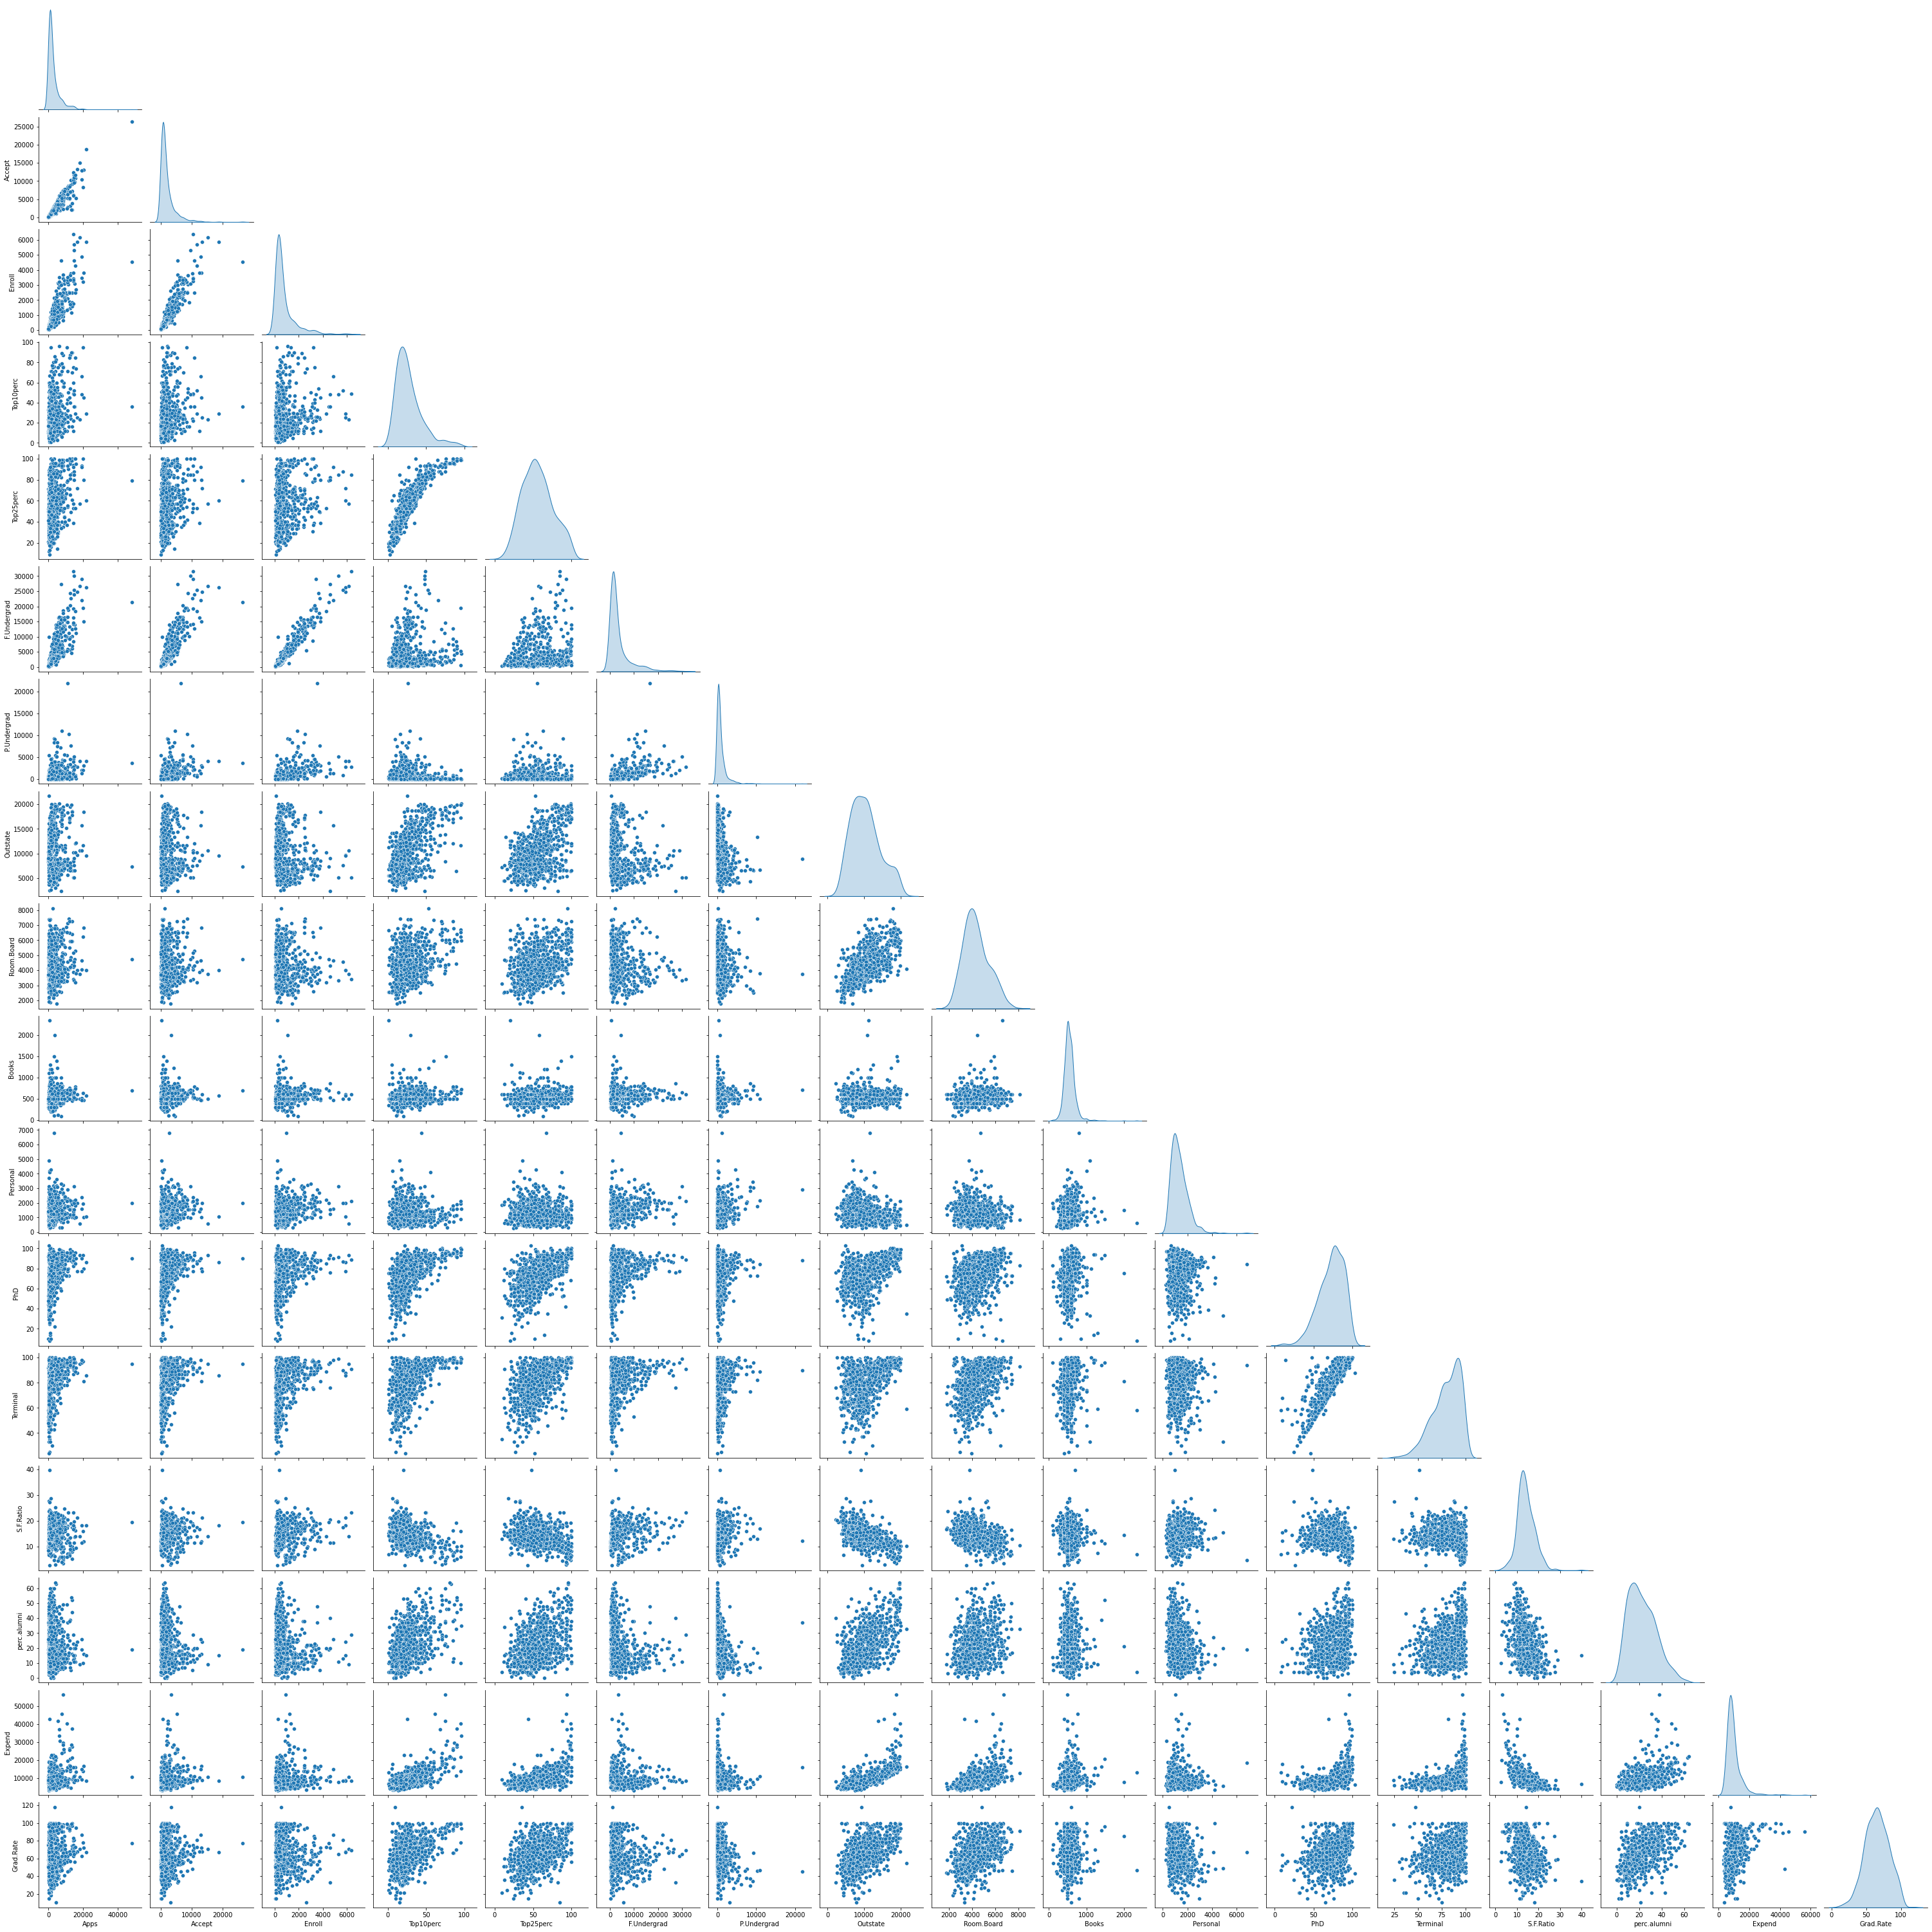

In [ ]:
sns.pairplot(Ed, diag_kind='kde', corner=True)


In [ ]:
Ed1 = Ed.corr()
Ed1


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


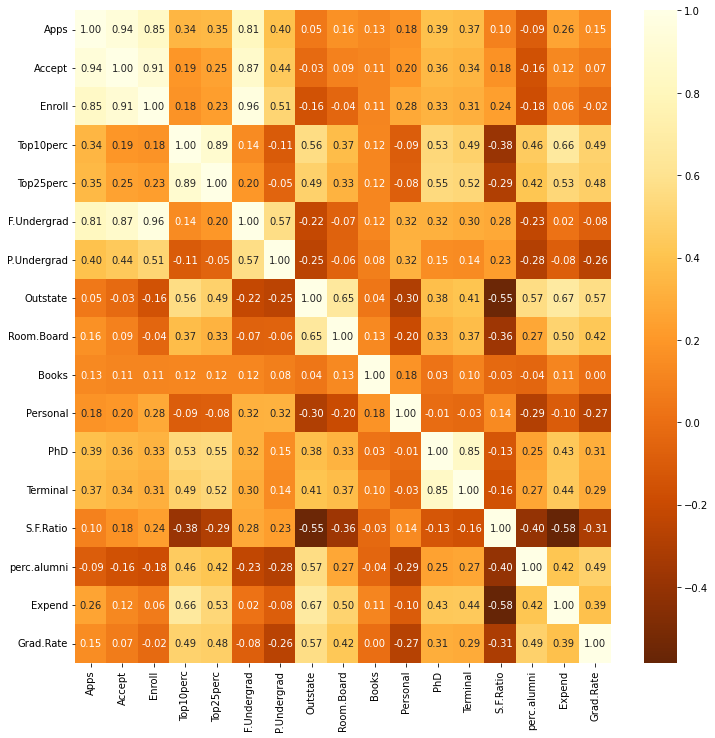

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(Ed1, annot=True, fmt = '.2f', cmap='YlOrBr_r')

2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.


In [ ]:
Ed1 = Ed.drop(['Names'], axis =1)

In [ ]:
from scipy.stats import zscore
Ed_z=Ed1.apply(zscore)
Ed_z.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]


In [ ]:
cov_matrix = np.cov(Ed_z.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [ ]:
Ed_z1 = Ed_z.corr()
Ed_z1


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?


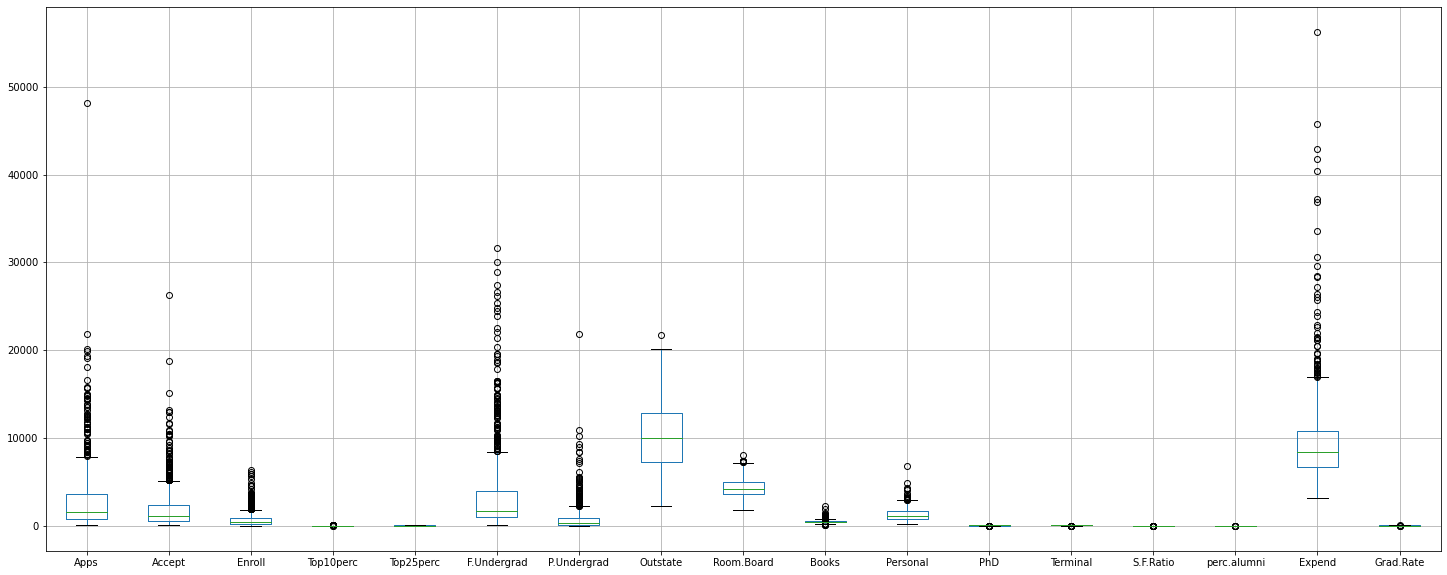

In [ ]:
Ed.boxplot(figsize=(25,10))

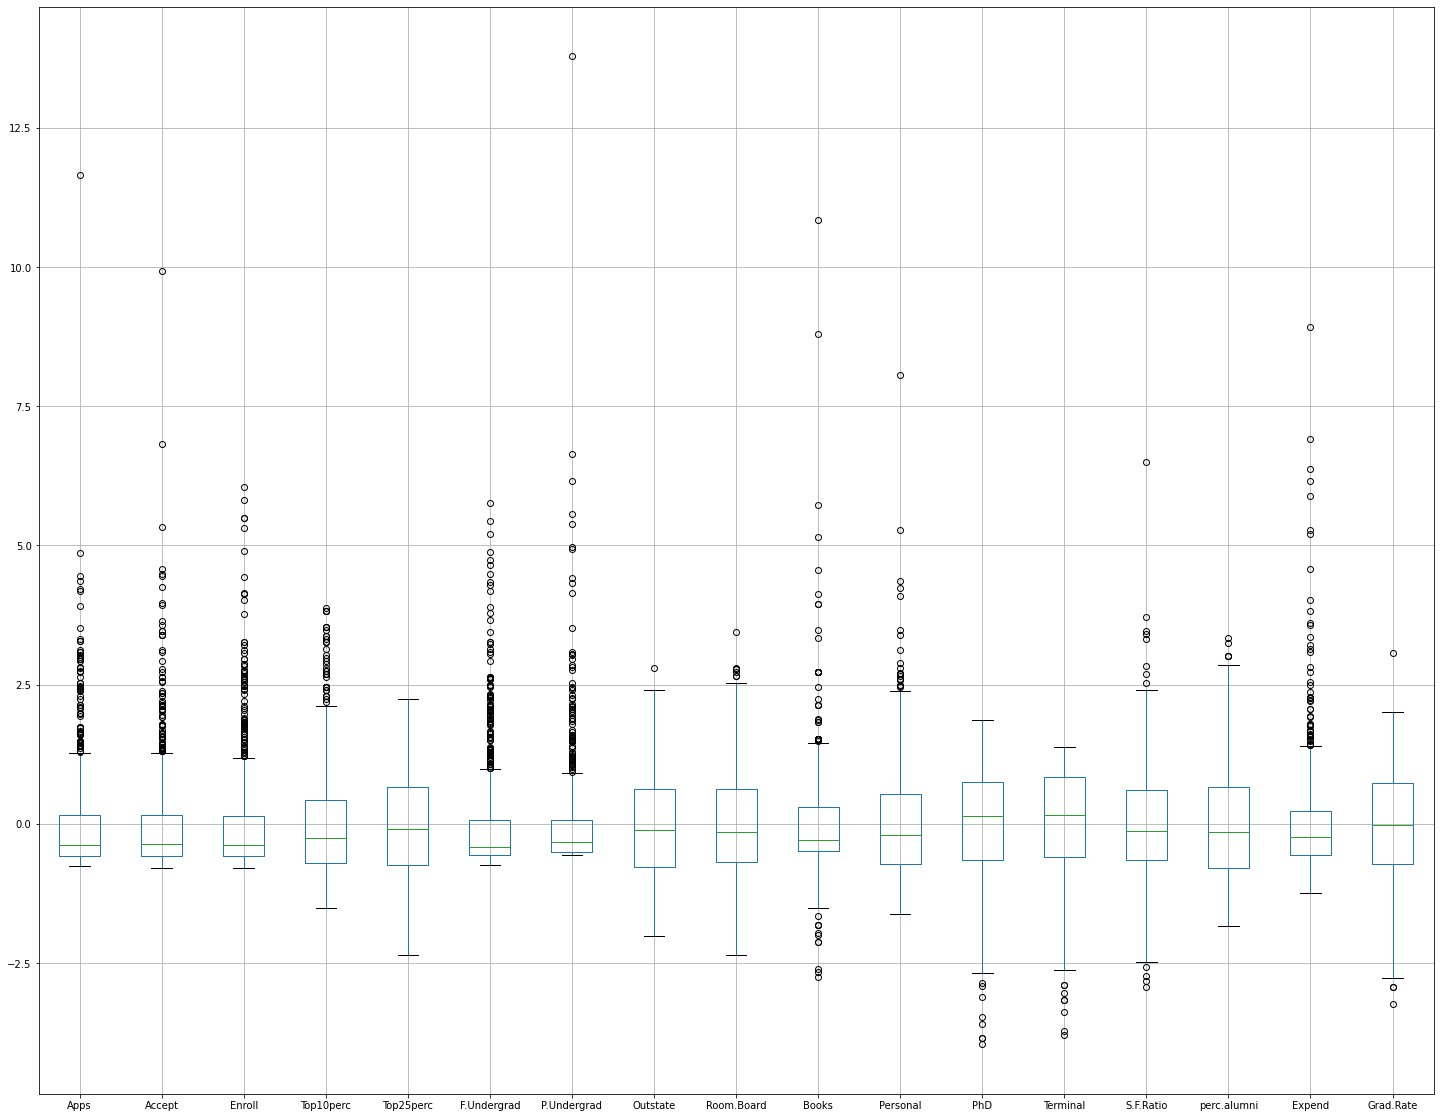

In [ ]:
Ed_z.boxplot(figsize=(25,20))


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
lratio,uratio=remove_outlier(Ed['Apps'])
Ed['Apps']=np.where(Ed['Apps']>uratio,uratio,Ed['Apps'])
Ed['Apps']=np.where(Ed['Apps']<lratio,lratio,Ed['Apps'])

lratio,uratio=remove_outlier(Ed['Accept'])
Ed['Accept']=np.where(Ed['Accept']>uratio,uratio,Ed['Accept'])
Ed['Accept']=np.where(Ed['Accept']<lratio,lratio,Ed['Accept'])

lratio,uratio=remove_outlier(Ed['Enroll'])
Ed['Enroll']=np.where(Ed['Enroll']>uratio,uratio,Ed['Enroll'])
Ed['Enroll']=np.where(Ed['Enroll']<lratio,lratio,Ed['Enroll'])

lratio,uratio=remove_outlier(Ed['Top10perc'])
Ed['Top10perc']=np.where(Ed['Top10perc']>uratio,uratio,Ed['Top10perc'])
Ed['Top10perc']=np.where(Ed['Top10perc']<lratio,lratio,Ed['Top10perc'])

lratio,uratio=remove_outlier(Ed['F.Undergrad'])
Ed['F.Undergrad']=np.where(Ed['F.Undergrad']>uratio,uratio,Ed['F.Undergrad'])
Ed['F.Undergrad']=np.where(Ed['F.Undergrad']<lratio,lratio,Ed['F.Undergrad'])

lratio,uratio=remove_outlier(Ed['P.Undergrad'])
Ed['P.Undergrad']=np.where(Ed['P.Undergrad']>uratio,uratio,Ed['P.Undergrad'])
Ed['P.Undergrad']=np.where(Ed['P.Undergrad']<lratio,lratio,Ed['P.Undergrad'])

lratio,uratio=remove_outlier(Ed['Room.Board'])
Ed['Room.Board']=np.where(Ed['Room.Board']>uratio,uratio,Ed['Room.Board'])
Ed['Room.Board']=np.where(Ed['Room.Board']<lratio,lratio,Ed['Room.Board'])

lratio,uratio=remove_outlier(Ed['Books'])
Ed['Books']=np.where(Ed['Books']>uratio,uratio,Ed['Books'])
Ed['Books']=np.where(Ed['Books']<lratio,lratio,Ed['Books'])

lratio,uratio=remove_outlier(Ed['Personal'])
Ed['Personal']=np.where(Ed['Personal']>uratio,uratio,Ed['Personal'])
Ed['Personal']=np.where(Ed['Personal']<lratio,lratio,Ed['Personal'])

lratio,uratio=remove_outlier(Ed['PhD'])
Ed['PhD']=np.where(Ed['PhD']>uratio,uratio,Ed['PhD'])
Ed['PhD']=np.where(Ed['PhD']<lratio,lratio,Ed['PhD'])

lratio,uratio=remove_outlier(Ed['Terminal'])
Ed['Terminal']=np.where(Ed['Terminal']>uratio,uratio,Ed['Terminal'])
Ed['Terminal']=np.where(Ed['Terminal']<lratio,lratio,Ed['Terminal'])

lratio,uratio=remove_outlier(Ed['S.F.Ratio'])
Ed['S.F.Ratio']=np.where(Ed['S.F.Ratio']>uratio,uratio,Ed['S.F.Ratio'])
Ed['S.F.Ratio']=np.where(Ed['S.F.Ratio']<lratio,lratio,Ed['S.F.Ratio'])

lratio,uratio=remove_outlier(Ed['perc.alumni'])
Ed['perc.alumni']=np.where(Ed['perc.alumni']>uratio,uratio,Ed['perc.alumni'])
Ed['perc.alumni']=np.where(Ed['perc.alumni']<lratio,lratio,Ed['perc.alumni'])

lratio,uratio=remove_outlier(Ed['Expend'])
Ed['Expend']=np.where(Ed['Expend']>uratio,uratio,Ed['Expend'])
Ed['Expend']=np.where(Ed['Expend']<lratio,lratio,Ed['Expend'])

lratio,uratio=remove_outlier(Ed['Grad.Rate'])
Ed['Grad.Rate']=np.where(Ed['Grad.Rate']>uratio,uratio,Ed['Grad.Rate'])
Ed['Grad.Rate']=np.where(Ed['Grad.Rate']<lratio,lratio,Ed['Grad.Rate'])


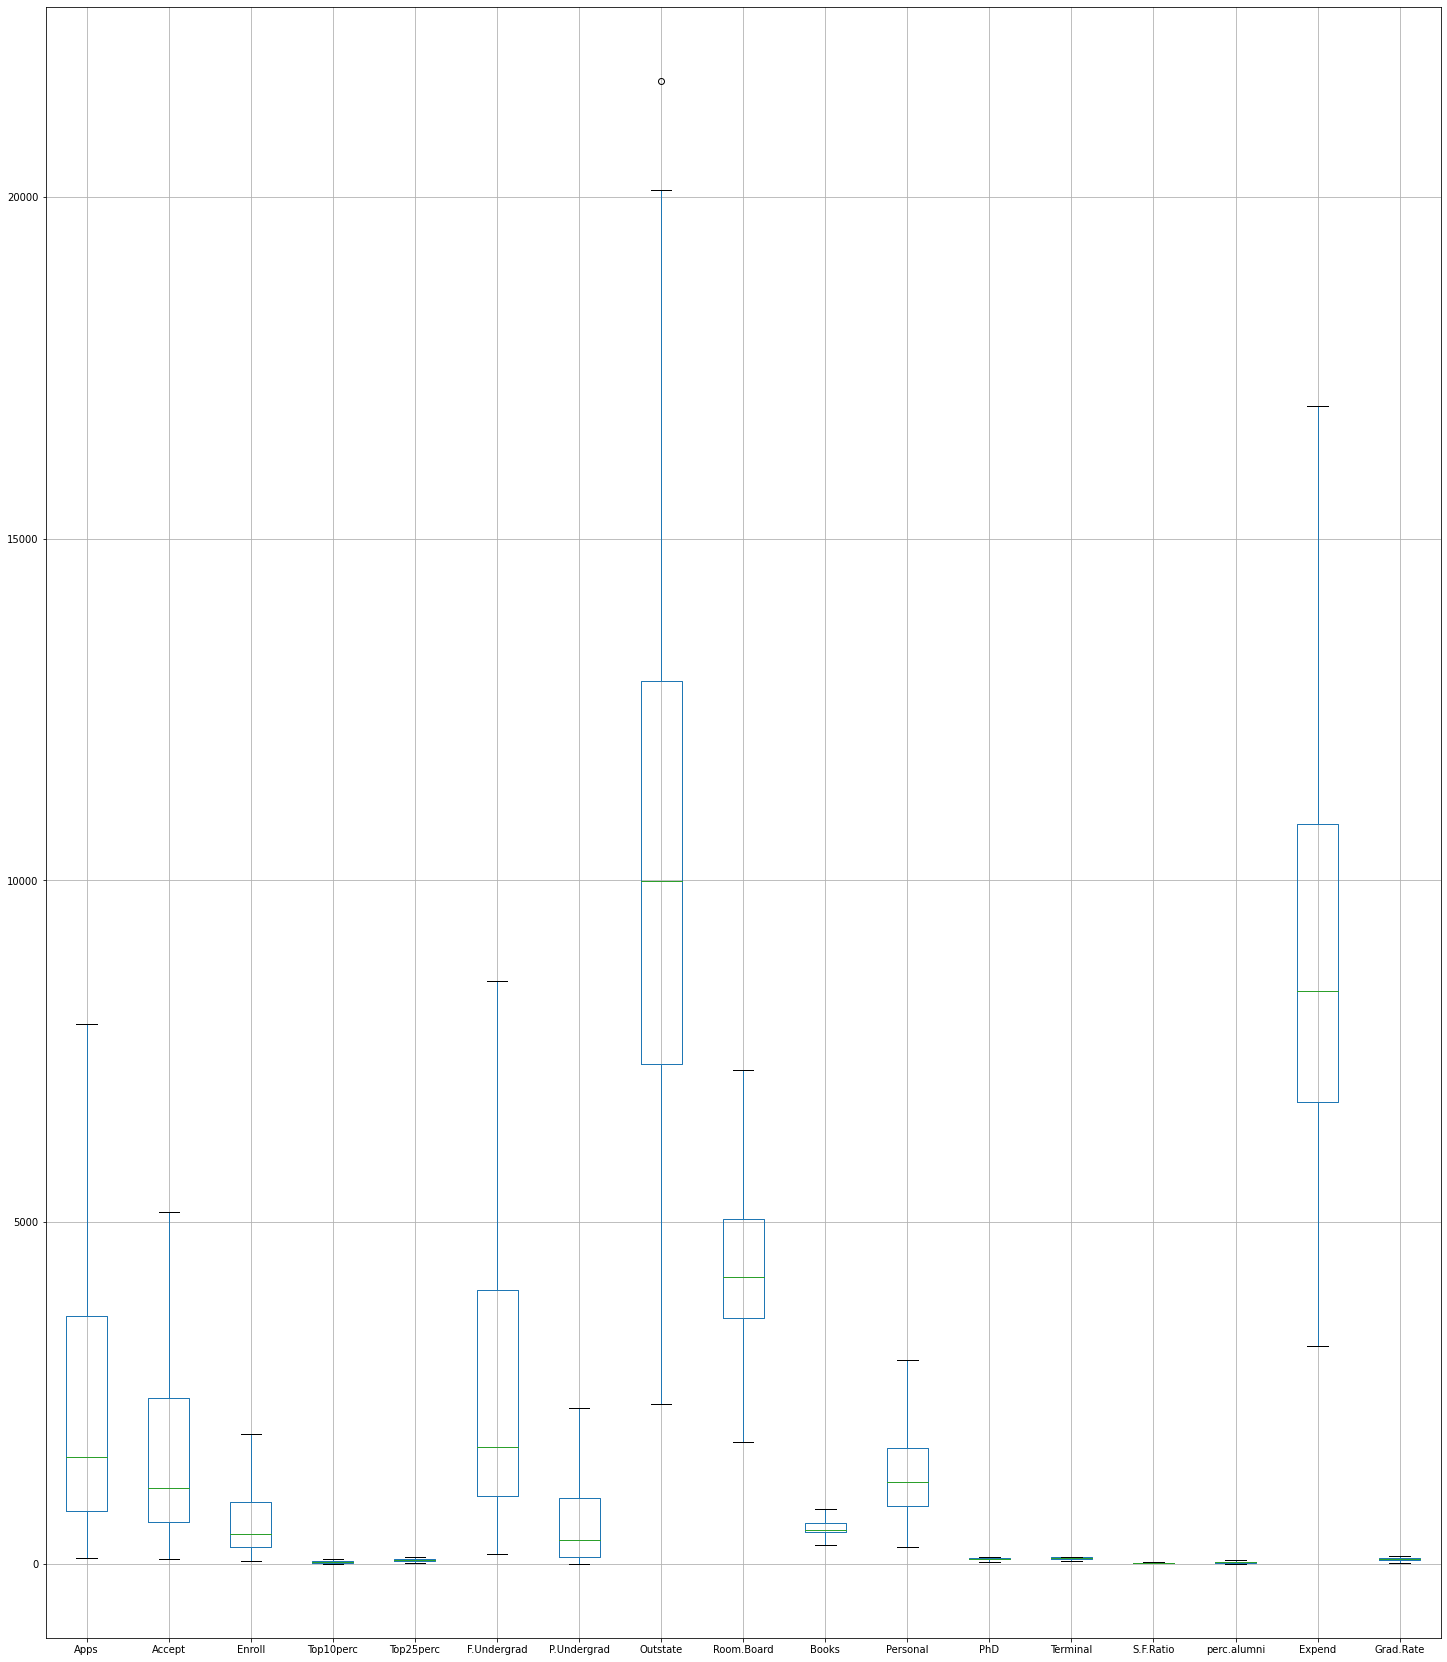

In [ ]:
plt.subplots(figsize=(25,30))
Ed.boxplot(figsize=(25,20))

2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]


In [ ]:
from scipy.stats import zscore
Ed_z=Ed1.apply(zscore)
Ed_z.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [ ]:
Ed_z.T


,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
Apps,-0.346882,-0.210884,-0.406866,-0.668261,-0.726176,-0.624307,-0.684808,-0.285088,-0.507700,-0.625600,...,-0.176238,-0.736777,-0.264404,-0.387991,-0.060407,-0.208040,-0.269575,-0.233895,1.991711,-0.003268
Accept,-0.321205,-0.038703,-0.376318,-0.681682,-0.764555,-0.628611,-0.685356,-0.121984,-0.481644,-0.620854,...,-0.087284,-0.771903,-0.114227,-0.442453,0.120511,-0.205673,-0.087284,-0.042377,0.177256,-0.066872
Enroll,-0.063509,-0.288584,-0.478121,-0.692427,-0.780735,-0.669812,-0.729043,-0.313353,-0.595505,-0.654735,...,-0.011817,-0.759196,-0.220739,-0.545967,-0.105509,-0.255200,-0.091509,-0.091509,0.578333,-0.095816
Top10perc,-0.258583,-0.655656,-0.315307,1.840231,-0.655656,0.592287,-0.598931,0.535563,0.138490,-0.372032,...,-0.201858,-0.598931,0.819186,1.329708,1.216259,-1.336352,-0.201858,0.365389,3.825595,0.025041
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031,0.313426,-0.545505,0.616579,0.363952,-0.596031,...,0.262901,-0.747607,0.616579,1.374460,1.526036,-1.505488,-0.444454,0.262901,2.182866,0.363952
F.Undergrad,-0.168116,-0.209788,-0.549565,-0.658079,-0.711924,-0.623421,-0.677472,-0.434450,-0.562562,-0.598459,...,-0.062903,-0.705116,-0.354818,-0.544820,-0.185239,-0.126030,-0.175543,-0.187095,0.312977,-0.146867
P.Undergrad,-0.209207,0.244307,-0.497090,-0.520752,0.009005,-0.535212,-0.410988,-0.541127,-0.361036,-0.510893,...,-0.121791,-0.547700,-0.467513,-0.539812,-0.505635,0.771435,0.165435,-0.453053,-0.507606,0.572283
Outstate,-0.746356,0.457496,0.201305,0.626633,-0.716508,0.760947,0.708713,0.852479,1.282036,0.006798,...,-1.005035,-0.333464,1.369837,0.556988,1.353919,-0.906289,0.268462,-0.880670,2.337894,-1.355744
Room.Board,-0.964905,1.909208,-0.554317,0.996791,-0.216723,-0.932970,1.243144,0.427443,0.038754,-0.891911,...,-0.880962,-0.599938,0.042403,-0.189351,0.923798,-0.417455,0.549707,-0.143730,1.963953,-0.727676
Books,-0.602312,1.215880,-0.905344,-0.602312,1.518912,-0.299280,-0.299280,-0.602312,-1.511408,0.670422,...,0.185571,-0.299280,-0.905344,0.337087,-0.117461,-0.299280,0.306784,0.409815,0.488603,-0.299280


In [ ]:
cov_matrix = np.cov(Ed_z.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features


In [ ]:
pca = PCA(n_components=17)
X_pca= pca.fit_transform(Ed_z)

In [ ]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [ ]:
Ed_z.columns


Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [ ]:
pca.components_


array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

The first PC can be represented using linear combination of features and its coefficients/weights
PC1=c11 * X1+c12 * X2+c13 * X3+c14 * X4....…

where X1,X2,X3,X4... are original variables/features before transformation.

In this scenario PC1 can be represented as linear combination of below components

[c11 c12 c13 c14....c117]= [[-2.62171542e-01 3.14136258e-01 8.10177245e-02 -9.87761685e-02
-2.19898081e-01 2.18800617e-03 -2.83715076e-02 -8.99498102e-02
1.30566998e-01 -1.56464458e-01 -8.62132843e-02 1.82169814e-01
-5.99137640e-01 8.99775288e-02 8.88697944e-02 5.49428396e-01
5.41453698e-03]

[X1 X2 X3.......X17]=['Apps' 'Accept' 'Enroll' 'Top10Perc' 'Top25Perc' 'F.Undergrad' 'P.Undergrad' 'Outstate'
'Room.Board' 'Books' 'Personal' 'PhD' 'Terminal' 'S.F.Ratio' 'perc.alumni' 'Expend'
'Grad.rate']

In [ ]:
print('The Linear eq of 1st component: ')
for i in range(0,Ed_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),Ed_z.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?


In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

In [ ]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(Ed_z)


In [ ]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309213, -0.10124903, -0.08298557,  0.03505554, -0.02414794,
        -0.06139299,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603754, -0.2898484 , -0.14698927,
         0.22674399, -0.20806465],
       [ 0.2813105 ,  0.26781739,  0.16182678, -0.05154724, -0.10976654,
         0.10041231, -0.15855848,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

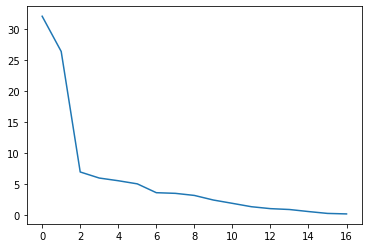

In [ ]:
plt.plot(var_exp)


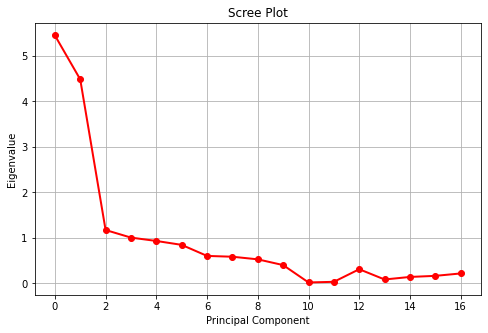

In [ ]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(Ed_z.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
Ed_comp = pd.DataFrame(pca.components_,columns=list(Ed_z))
Ed_comp


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281310,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


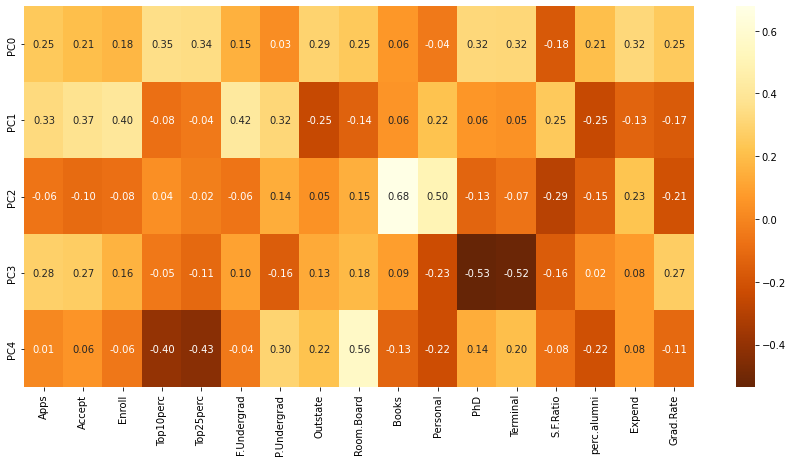

In [ ]:
plt.figure(figsize= (15,7))
sns.heatmap(Ed_comp, cmap= 'YlOrBr_r', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()


2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]


This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university.

 To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. From multivariate analysis we can understand the correlation of variables.

  Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. The scaling helps the dataset to standardize the variable in one scale. Outliers are imputed using IQR values once the values are imputed we can perform PCA.
  
   The principal component analysis is used reduce the multicollinearity between the variables. Depending on the variance of the dataset we can reduce the PCA components.
   
The PCA components for this business case is 5 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset

